# STEP ONE
> Save a copy of the Notebook in your gdrive that you will share it and allow commenting!

# Homework Rules
- get the 10/10 homework grade if:
    - the homework is complete
- get feedback on your solution if so and pro tips if:
    - submitted before the deadline whether the competition or the homework

# Competition rules | Bonus
- the top 3 scores get 5 bonus 15/10
- top 7 get score of 3 bonus 13/10
- top 10 get score of 1 bonus 11/10
- you are limitted to use ANN, hence CNN/RNN will be ignored
- you can use whatever works from regularization techniques if you will
- competition is applied only for the CIFAR10 dataset
- you are free to use MNIST dataset if not planning to join the competition
- `The homework deadline is Saturday 05/2/2021 11:59:00 PM won't consider after that`
> ### Remember
> your bonus history is considered for the LinkedIn recommendation for top performers

# project outcomes
- get hands on Tensorflow/Keras
- get hands on solving the image recognition problem
- will help you get confidence on a harder data
- will allow us to work with real dataset from kaggle in the CNN modules
- you have something to tell people that you managed to do
- search for a better solutions that may improve your model
- understanding each part of the network and how it impacts your result


# Import your modules

In [ ]:
# hint where to find keras sub-modules
# -----------------------------------
# |———————<datasets>
# |  ├─────────<cifar10>
# |  └─────────<mnist>
# |———————<models>
# |  └─────────<Sequential>
# |———————<layers>
# |  └─────────<Dense>
# |———————<utils>
# |  ├─────────<to_categorical>
# |  └─────────<plot_model>
# |———————<callbacks>
# |  ├─────────<EarlyStopping>
# |  ├─────────<ModelCheckpoint>
# |  └─────────<ReduceLROnPlateau>
# |———————<optimizers>
#    └─────────<Adam>

# do your imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, SGD, RMSprop




# Load the CIFAR10 data from keras
This is one of the popular datasets for the image recognition task specially in the early researchs even popular CNN architectures like Resnet50 scored 95% acc on this data so don't worry if you couldn't achieve high results.

use that dictionary to name the classes
```python
id2class = {
    "0": "airplane", "1": "automobile", "2": "bird", 
    "3": "cat", "4": "deer", "5": "dog", "6": "frog", 
    "7": "hourse", "8": "ship", "9": "truck"
}
```

> visualize some random images using the helper function **`plot_batch`** below!

you can use this code to generate a random batch ids

```python
>>> random_ids = np.random.randint(0, 1000, BATCH_SIZE)

```
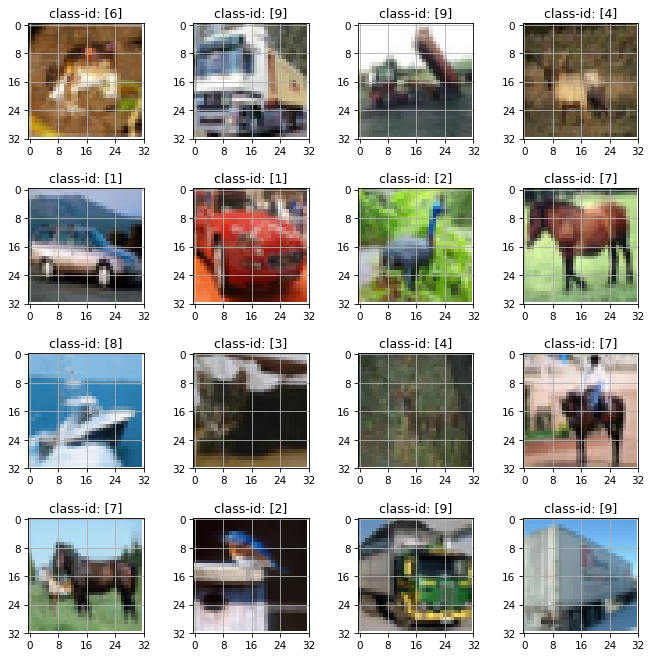

In [ ]:
def plot_batch(X, Y, figSize=(9, 9), dpi=75, cells_per_col=4, color=None):
    """
    This function plots a batch of the raw images with its true targets

    Parameters
    ----------
    X : (np.ndarray)
        batch of images to classify and plot

    Y : (np.ndarray)
        batch of predicted labels

    figSize : (tuple)
        initialize the figure size

    dpi : (int)
        increase/decrease zoom of subplots

    cells_per_col : (int)
        max number of columns in the figure

    color : (str)
        change the color map of the image plot
    """
    
    m = len(X)  # length of the batch
    img_size = X[0].shape
    fig = plt.figure(figsize=figSize, dpi=dpi)  
    for i in range(m):  # for each img in the batch
        class_id = Y[i] # get the current image true value 
        axis = fig.add_subplot(round(m/cells_per_col), cells_per_col, i+1) # display a grid of subplots
        axis.imshow(X[i], cmap=color)                   # plot each image
        axis.set_title("class-id: " + str(class_id))    # set the title of the img with the ture value
        axis.set_xticks(np.linspace(0, img_size[1], 5)) # scale the x-axis to match the image width
        axis.set_yticks(np.linspace(0, img_size[0], 5)) # scale the y-axis to match the image height
        axis.grid()
    fig.tight_layout(pad=1.5)
    plt.show()

In [ ]:
# load the dataset here
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()

Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape

170500096/170498071 [==============================] - 3s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

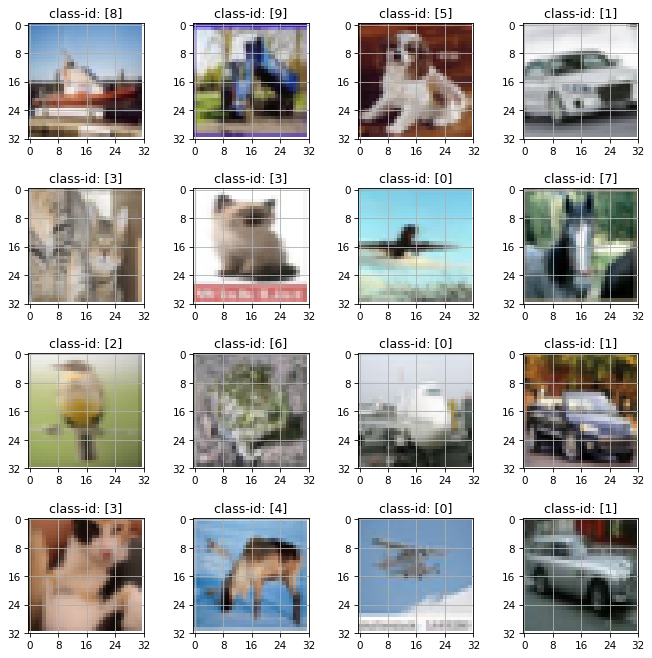

In [ ]:
# index a random batch of the images, targets array and plot it

idx = np.random.randint(0, 1000, size=16)
plot_batch(Xtrain[idx], Ytrain[idx], figSize=(9, 9), dpi=75, cells_per_col=4, color=None)

# preprocess the images and target arrays
* scale the images pixels from $[0:1]$
* reshape `"flatten"` the images into the proper shape the ANN will expect
* one hot encode the targets to match the neuarl network output


In [ ]:
# rescale & flatten the images pixels values
Xtrain = Xtrain.reshape((Xtrain.shape[0], -1))  #(50000, 32*32*3)
Xtrain = Xtrain / 255  # normalize values

Xtest = Xtest.reshape((Xtest.shape[0], -1))
Xtest = Xtest / 255

# print the new shape of the images and the min and max values in the images array
print(f'New shape of Xtrain is {Xtrain.shape}')
print(f'New shape of Xtest is {Xtest.shape}')
print(f'min value: {Xtrain.min()}')
print(f'max value: {Xtrain.max()}')

New shape of Xtrain is (50000, 3072)
New shape of Xtest is (10000, 3072)
min value: 0.0
max value: 1.0


In [ ]:
# one hot encode the target vectors
Ytrain = to_categorical(Ytrain)
Ytest = to_categorical(Ytest)

# print the new shape of the targets
Ytrain.shape, Ytest.shape

((50000, 10), (10000, 10))

# Build the Network (ANN)

<img src="https://icdn6.digitaltrends.com/image/digitaltrends/artificial_neural_network_1-791x388.jpg">

> choose whatever works for you to build the network as we did in the class
using the [Sequential](https://www.tensorflow.org/guide/keras/sequential_model) model from [TF2](https://www.tensorflow.org/) try different number of layers, neurons per layer and different activation functions &rarr; [here](https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253), or [here](https://www.geeksforgeeks.org/activation-functions-neural-networks/)


use `model.summary()` or [plot_model](https://keras.io/api/utils/model_plotting_utils/) to visualize your model conncections


In [ ]:
# build the network here
model = Sequential([
    Dense(units=512, activation='elu', input_shape=[Xtrain.shape[1]]),
    Dropout(0.1),   # reduce overfitting
    Dense(units=256, activation='elu'),
    Dropout(0.1),   # reduce overfitting
    Dense(units=10, activation="softmax")
])

# visualize the network
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                2570      
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________


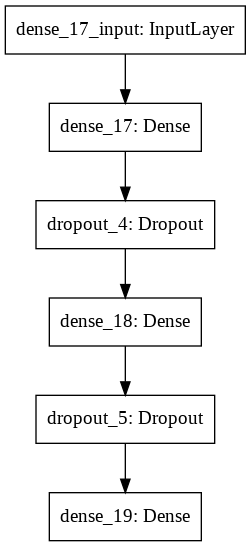

In [ ]:
# visualize the network
plot_model(
    model,
    to_file="model.png")

# Configure the Loss/optimizer/metric

> use the [model.compile](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) to do that and specify the model arguments (loss=, metrics=, optimizer=)

> adam is not a dark magic works for everything you may try other [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) that can achieve more better, so
read more about the optimizers from [here](https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6), or [here](https://heartbeat.fritz.ai/exploring-optimizers-in-machine-learning-7f18d94cd65b) if you are curious about maths behind and I highly encourage doing so!

you can pass the **`optimizer argument`** as (str) &rarr; "Adam", or creating object from the optimizer class Adam(learning_rate=) if so choose a suitable **`lr`** value between $[10^{-2}:10^{-5}]$

for the **`metrics`** argument please specify at least the "accuracy" so I can score your model and set the bonus for the validation/test accuracy so monitore them in your callbacks

In [ ]:
# configure the loss and optimizer and the metrics for the training
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(learning_rate=0.001), 
              metrics=['acc'])

# Configure the training callbacks if any

open sugguestions [here](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks)
- **`class EarlyStopping`**: Stop training when a monitored metric has stopped improving.
- **`class ModelCheckpoint`**: Callback to save the Keras model or model weights at some frequency.
- **`class ReduceLROnPlateau`**: Reduce learning rate when a metric has stopped improving.

**`hint`**
> use small patience relative to eh epochs at the begining and monitor the validation [acc]

so you can stop the model early and tweak it better then rerun you will do that several times until you think it is the best way possible!



In [ ]:
# configure the training callbacks if any

rlr = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 10,
                         verbose = 1,
                         factor = 0.85,
                         min_lr = 1e-6)

mcp = ModelCheckpoint("./model", verbose=1, save_best_only=True)

es = EarlyStopping(verbose=1, patience=10)


# Train the network

> use small number of epochs at the begining to allow you to edit the model faster
\
once you think you got a good model configs increase the epochs to a reasonable number between 100:1000 not less not more.

choose the values that works best for you of the training rules:
- **`epochs`**: iterations for each the model will see all the data
- **`batch_size`**: the number of batches for your optimizer {stochastic/mini_batch/full_batch} ensure that it matches the memory size
- **`validation_split`**: the ratio to split the training data into train/validation
- **`callbacks`**: the functions to apply within the training loop

> don't forget to save the history of the training you can use a callback for that or:
```python
    >>>> history = model.fit(...)
```


In [ ]:
# feed the data and train the network
history = model.fit(Xtrain,
          Ytrain,
          batch_size=32,
          epochs=20, 
          verbose=1, 
          callbacks=[rlr, mcp, es], 
          validation_split=0.2
)

Epoch 1/20
1250/1250 [==============================] - 4s 3ms/step - loss: 2.3317 - acc: 0.2309 - val_loss: 1.8038 - val_acc: 0.3392

Epoch 00001: val_loss improved from inf to 1.80382, saving model to ./model
INFO:tensorflow:Assets written to: ./model/assets
Epoch 2/20
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8367 - acc: 0.3349 - val_loss: 1.6835 - val_acc: 0.3941

Epoch 00002: val_loss improved from 1.80382 to 1.68348, saving model to ./model
INFO:tensorflow:Assets written to: ./model/assets
Epoch 3/20
1250/1250 [==============================] - 3s 3ms/step - loss: 1.7187 - acc: 0.3830 - val_loss: 1.6831 - val_acc: 0.3962

Epoch 00003: val_loss improved from 1.68348 to 1.68311, saving model to ./model
INFO:tensorflow:Assets written to: ./model/assets
Epoch 4/20
1250/1250 [==============================] - 3s 3ms/step - loss: 1.6576 - acc: 0.4052 - val_loss: 1.5799 - val_acc: 0.4378

Epoch 00004: val_loss improved from 1.68311 to 1.57991, saving model to ./

In [ ]:
# Please Note: Although I have a low accuracy but there is no overfitting in my model 
# i have a low loss for validation and training

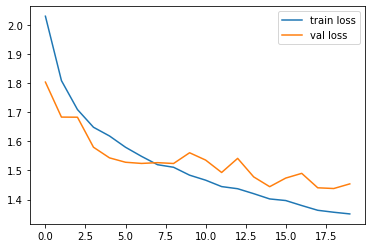

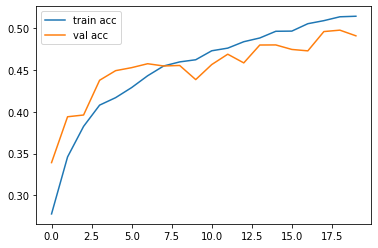

In [ ]:
# plot the loss history [train_loss, validation_loss] in a plot
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()


# plot the accuracy history [train_acc, val_acc] in a plot in a separate plot
plt.figure()
plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend()

# save the model into tf file and the history to a csv file

save it using [tensorflow.keras.models.save_model()](https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model#expandable-1)


```python
        tf.keras.models.save_model(
        model, filepath, overwrite=True, include_optimizer=True, save_format=None,
        signatures=None, options=None, save_traces=True
    )

```
**`model`** 	Keras model instance to be saved.
\
**`filepath`** 	One of the following:
String or pathlib.Path object, path where to save the model
h5py.File object where to save the model 
\
**`overwrite`** 	Whether we should overwrite any existing model at the target location, or **`instead`** ask the user with a manual prompt.
\
**`include_optimizer`** 	If True, save optimizer's state together.
\
**`save_format`** 	Either 'tf' or 'h5', indicating whether to save the model to Tensorflow SavedModel or HDF5. Defaults to 'tf' in TF 2.X. 
\
\
\
you can load it using [tensorflow.keras.models.load_model()](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model)


```python

    tf.keras.models.load_model(
        filepath, custom_objects=None, compile=True, options=None
    )

```

**`filepath`** 	One of the following:
String or pathlib.Path object, path to the saved model
h5py.File object from which to load the model 
\
**`custom_objects`** 	Optional dictionary mapping names (strings) to custom classes or functions to be considered during deserialization.
\
**`compile`** 	Boolean, whether to compile the model after loading.
\
**`options`** 	Optional tf.saved_model.LoadOptions object that specifies options for loading from SavedModel. 
\

In [ ]:
# save our model
save_model(model, './cifer10_model', overwrite=True)

INFO:tensorflow:Assets written to: ./cifer10_model/assets


In [ ]:
#load model
cifer10_model = load_model('./cifer10_model')

# Evaluate the model on testing data



In [ ]:
# print the accuracy, and loss scores on testing dataset
train_acc, train_loss = cifer10_model.evaluate(Xtrain, Ytrain, batch_size=32)
test_acc, test_loss = cifer10_model.evaluate(Xtest, Ytest, batch_size=32)

print(f"train acc: {train_acc}")
print(f"test acc: {test_acc}")

print(f"train loss: {train_loss}")
print(f"test loss: {test_loss}")

313/313 [==============================] - 1s 2ms/step - loss: 1.4351 - acc: 0.4929
train acc: 1.2731810808181763
test acc: 1.4351015090942383
train loss: 0.5414599776268005
test loss: 0.492900013923645


# Predict a batch from the test dataset and plot it 

> use Ypred_batch = [model.predict(Xtest_batch)](https://www.tensorflow.org/api_docs/python/tf/keras/Model)
\
 use `plot_batch(Xtest_batch, Ypred_batch)` to plot a test X &rarr; images batch, Y &rarr; predicted targets
 
make sure that the final Ypred_batch is array of int values of shape of (N, 1), or (N,) not (N, 10)
\
use batch size of 16 to index the test data and pass it to plot_batch

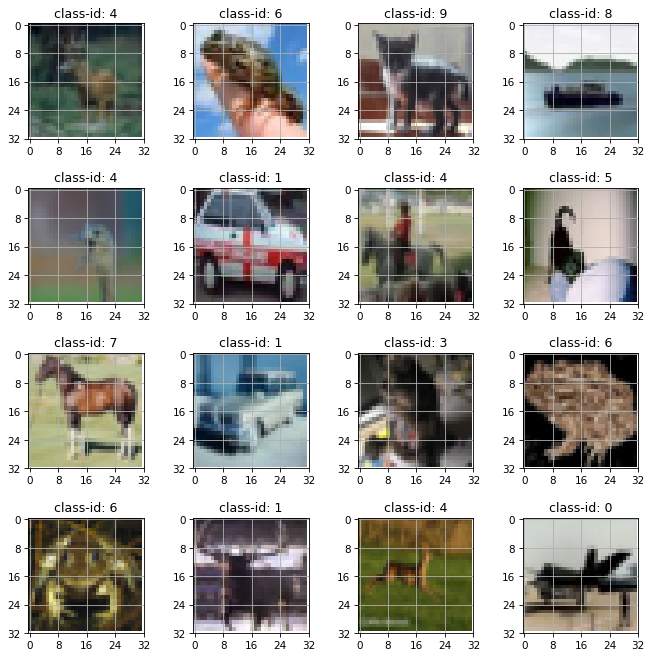

In [ ]:
# create a Xtest_batch
batch = np.random.randint(0, 1000, size=16) # 16 samples.
Xtest_batch = Xtest[batch]
Ytest_batch = Ytest[batch]

# predict the Ypred_batch
Ypred_batch = cifer10_model.predict(Xtest_batch)
Ypred_batch = Ypred_batch.argmax(axis=1)
Ytest_batch = Ytest_batch.argmax(axis=1) # from ohe to labels

Xtest_batch = Xtest_batch.reshape((16, 32, 32, 3))
# plot the predicted batch
plot_batch(Xtest_batch, Ypred_batch, figSize=(9, 9), dpi=75, cells_per_col=4, color=None)




In [ ]:
id2class = {
    "0": "airplane", "1": "automobile", "2": "bird", 
    "3": "cat", "4": "deer", "5": "dog", "6": "frog", 
    "7": "hourse", "8": "ship", "9": "truck" }

In [ ]:
print("True values:", Ytest_batch) # print True labels
print("pred values:", Ypred_batch) # print pred labels
print('-'*40)
for i in range(len(Ytest_batch)):
  print("True values:", id2class[str(Ytest_batch[i])]) # print True corresponding class
  print("pred values:", id2class[str(Ypred_batch[i])]) # print pred corresponding class
  print()

True values: [4 6 3 8 2 1 7 5 7 1 3 6 6 4 4 0]
pred values: [4 6 9 8 4 1 4 5 7 1 3 6 6 1 4 0]
----------------------------------------
True values: deer
pred values: deer

True values: frog
pred values: frog

True values: cat
pred values: truck

True values: ship
pred values: ship

True values: bird
pred values: deer

True values: automobile
pred values: automobile

True values: hourse
pred values: deer

True values: dog
pred values: dog

True values: hourse
pred values: hourse

True values: automobile
pred values: automobile

True values: cat
pred values: cat

True values: frog
pred values: frog

True values: frog
pred values: frog

True values: deer
pred values: automobile

True values: deer
pred values: deer

True values: airplane
pred values: airplane

